Exploratory Data Analysis on Data Science Salary

What is Data Science?
Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.

Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.

A data scientist is someone who creates programming code and combines it with statistical knowledge to create insights from data.



About Dataset

Data Science Job Salaries Dataset contains 11 columns, each are:
1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

In [1]:
#Import Libraries

!pip install country_converter


In [2]:
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

Read Dataset

In [3]:
df = pd.read_csv(r"C:\Users\vivih\Downloads\ds_salaries.csv")

In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Data Cleaning

Remove lines that have no meaning for data analysis

In [5]:
df.drop(["Unnamed: 0"],inplace=True, axis=1)

Replacing some of the values to understand the graphs clearly

In [6]:
# Remote_ratio

df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)

In [7]:
# Experience Level

df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace=True)

In [8]:
# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}

In [9]:
df['employment_type'] = df['employment_type'].map(employment_type_dict)


In [10]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full Time,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,M
3,2020,Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full Time,Data Engineer,154000,USD,154000,US,Fully Remote,US,M
603,2022,Senior,Full Time,Data Engineer,126000,USD,126000,US,Fully Remote,US,M
604,2022,Senior,Full Time,Data Analyst,129000,USD,129000,US,On-site,US,M
605,2022,Senior,Full Time,Data Analyst,150000,USD,150000,US,Fully Remote,US,M


In [11]:
df.shape

(607, 11)

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full Time,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,M
3,2020,Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,L


In [13]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,Senior,Full Time,Data Engineer,154000,USD,154000,US,Fully Remote,US,M
603,2022,Senior,Full Time,Data Engineer,126000,USD,126000,US,Fully Remote,US,M
604,2022,Senior,Full Time,Data Analyst,129000,USD,129000,US,On-site,US,M
605,2022,Senior,Full Time,Data Analyst,150000,USD,150000,US,Fully Remote,US,M
606,2022,Mid,Full Time,AI Scientist,200000,USD,200000,IN,Fully Remote,US,L


In [15]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [16]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 52.3+ KB


In [18]:
df.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [19]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [20]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [21]:
df.duplicated().sum()

42

In [22]:
df.corr()

,work_year,salary,salary_in_usd
work_year,1.000000,-0.087577,0.170493
salary,-0.087577,1.000000,-0.083906
salary_in_usd,0.170493,-0.083906,1.000000


In [24]:

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=17,family="Arial Bold"))

fig.show()

C:\Users\vivih\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



From treemap above, we can notice that Senior-level/Expert accounts for 46%, and Mid-level/Intermediate ranked the next.
There's only 4.28% of Executive-level/Director

In [25]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

Data scientist, data engineer and data analyst ranked top 3 frequent job titles, 
but it can be easily seen that others are also related to those top 3 job titles.

In [26]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 150,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

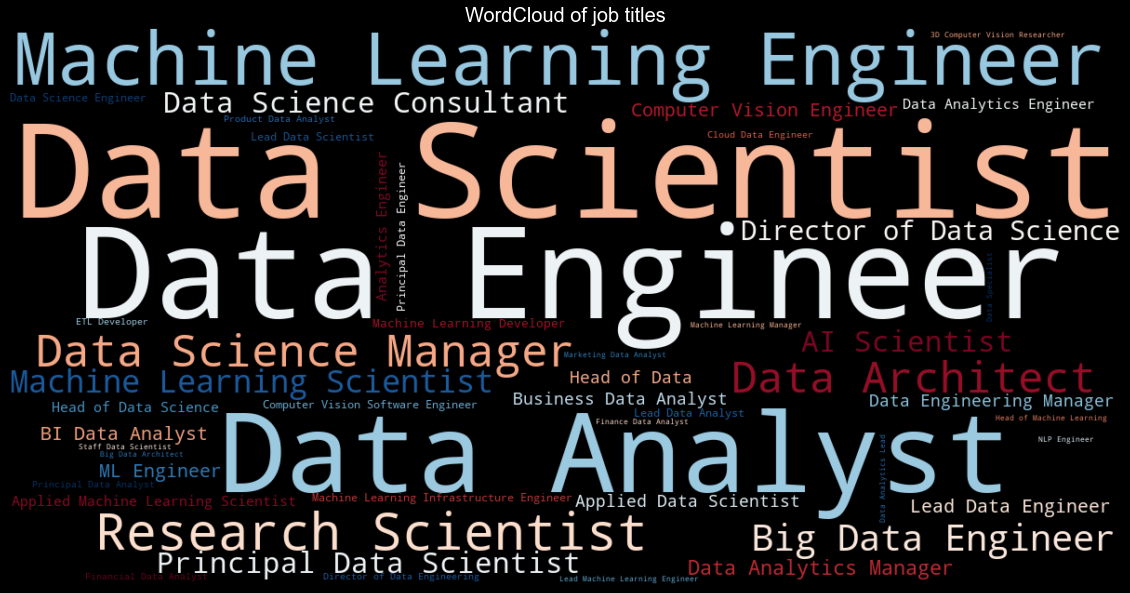

In [27]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

In [28]:
px.histogram(df, x = 'employment_type',histnorm = 'percent', 
             text_auto = '.2f',template = 'plotly_dark', title = 'Precentage of Employment Types')

Almost all employees have full time jobs

In [29]:
px.histogram(df, x = 'remote_ratio',color = 'work_year', barmode = 'group',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             template = 'plotly_dark',title='Count of each Work Type')

For each year (2020,2021,2022), the count for work type-remote is high.

In [30]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [31]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title = 'Employee Loaction Distribution Map')

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()

In [32]:
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= 'Top 10 Location of Employee',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [34]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country
c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Loaction', 
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values,marker_color='purple'),
    go.Bar(name='Company Location', x=top_10_company_location.index, 
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='grey')
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparison of Employee Location and Company Location',template='plotly_dark',
                  font = dict(size=17,family="Franklin Gothic"))

fig.show()

In [35]:
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', 
           hover_name = 'job_title', color = 'job_title', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'work_year', title = 'Experience level VS Salary').update_yaxes(categoryarray = 
           ['Entry', 'Mid', 'Senior', 'Executive'])